## TIME SERIES ANALYSIS ON CORONAVIRUS FOR THE NETHERLANDS THROUGH DAILY UPDATED DATASET (LATEST VERSION - 04/IV)

In [1]:
import pandas as pd
import requests
import datetime
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
#This part is for daily update the dataset.
today = datetime.now()
today = today.strftime('%Y-%m-%d')

yesterday = datetime.now() - timedelta(days=1)
yesterday = yesterday.strftime('%Y-%m-%d')

try: 
    url=f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{today}.xlsx'
    df = pd.read_excel(url, parse_date=[0],index_col=0)#Parsing date is for time series analysis  
    df_domain = pd.DataFrame(df)
    
except:    
    url=f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{yesterday}.xlsx'
    df = pd.read_excel(url, parse_date=[0],index_col=0)#Parsing date is for time series analysis  
    df_domain = pd.DataFrame(df)
        
print('Dataset is ready.')

df_domain.columns = ['Day','Month','Year','Cases','Deaths','Countries and territories','Geold','Country_Code','Population']

df_domain.drop('Day',1,inplace=True)
df_domain.drop('Month',1,inplace=True)
df_domain.drop('Year',1,inplace=True)
df_domain.drop('Countries and territories',1,inplace=True)
df_domain.drop('Country_Code',1,inplace=True)
df_domain.drop('Population',1,inplace=True)
df_NL = df_domain[df_domain['Geold'] == 'NL']
df_NL.drop('Geold',1,inplace=True)
df_NL.drop(df_NL.tail(1).index,inplace=True) # drop last row 31-12-2019


df_NL.head(10)


Dataset is ready.


,Cases,Deaths
dateRep,,
2020-04-04,1026,148
2020-04-03,1083,166
2020-04-02,1019,134
2020-04-01,845,175
2020-03-31,884,93
2020-03-30,1104,132
2020-03-29,1159,93
2020-03-28,1172,112
2020-03-27,1019,78


In [3]:
df_NL.tail(10)

,Cases,Deaths
dateRep,,
2020-01-10,0,0
2020-01-09,0,0
2020-01-08,0,0
2020-01-07,0,0
2020-01-06,0,0
2020-01-05,0,0
2020-01-04,0,0
2020-01-03,0,0
2020-01-02,0,0


In [4]:
type(df.index[0]) #Checking the dates whether they are timestamp or not.

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
df_NL.shape

(95, 2)

In [6]:
df_NL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95 entries, 2020-04-04 to 2020-01-01
Data columns (total 2 columns):
Cases     95 non-null int64
Deaths    95 non-null int64
dtypes: int64(2)
memory usage: 2.2 KB


In [7]:
df_NL.isnull().sum()

Cases     0
Deaths    0
dtype: int64

In [8]:
df_NL.describe()

,Cases,Deaths
count,95.000000,95.000000
mean,165.505263,15.652632
std,332.934211,39.185258
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,94.000000,1.000000
max,1172.000000,175.000000


## General Trendline

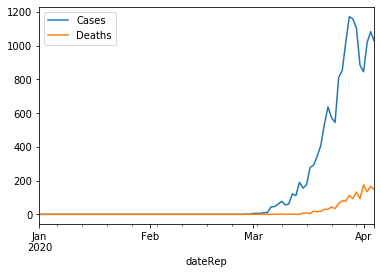

In [9]:
df_NL.resample('D').mean().plot()

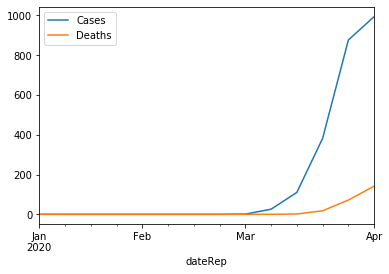

In [10]:
df_NL.resample('W').mean().plot()

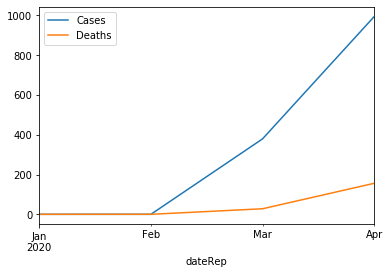

In [11]:
df_NL.resample('M').mean().plot()

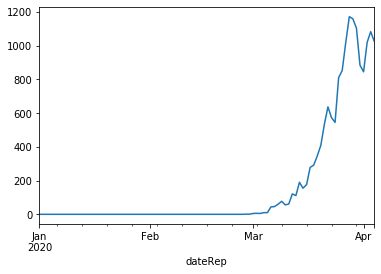

In [12]:
df_NL['Cases'].resample('D').mean().plot()

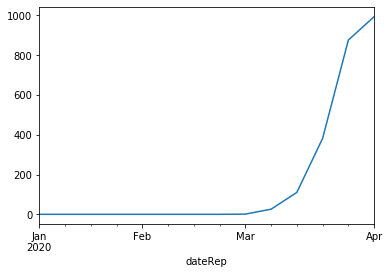

In [13]:
df_NL['Cases'].resample('W').mean().plot()

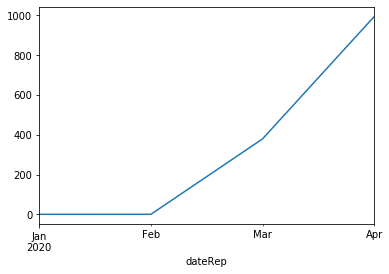

In [14]:
df_NL['Cases'].resample('M').mean().plot()

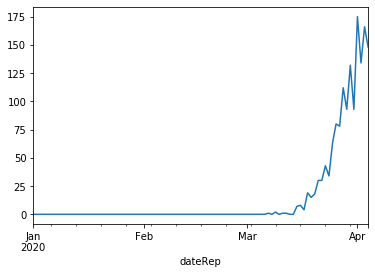

In [15]:
df_NL['Deaths'].resample('D').mean().plot()

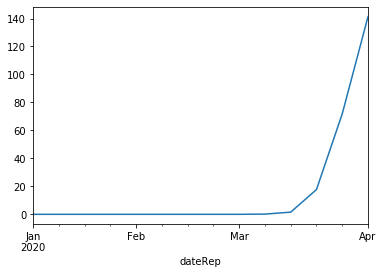

In [16]:
df_NL['Deaths'].resample('W').mean().plot()

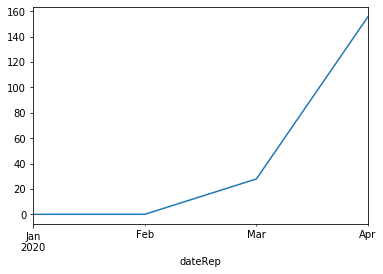

In [17]:
df_NL['Deaths'].resample('M').mean().plot()

## March Analysis

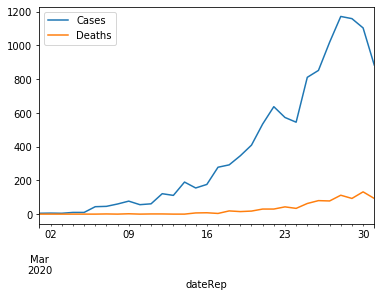

In [18]:
df_NL['2020-03'].resample('D').mean().plot()

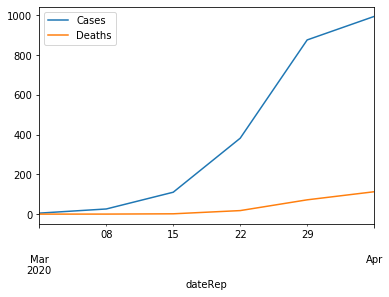

In [19]:
df_NL['2020-03'].resample('W').mean().plot()

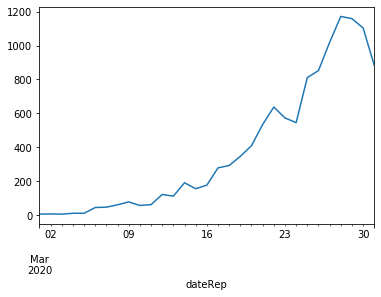

In [20]:
df_NL.Cases['2020-03'].resample('D').mean().plot()

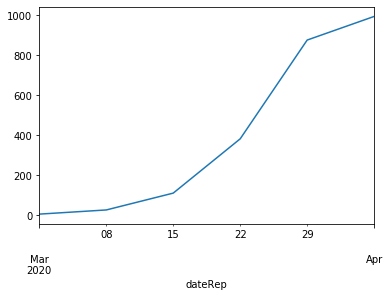

In [21]:
df_NL.Cases['2020-03'].resample('W').mean().plot()

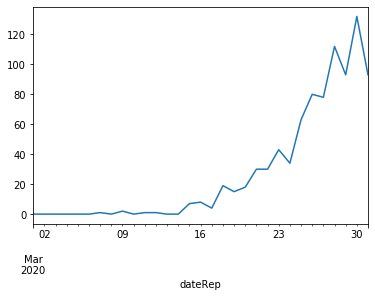

In [22]:
df_NL.Deaths['2020-03'].resample('D').mean().plot()

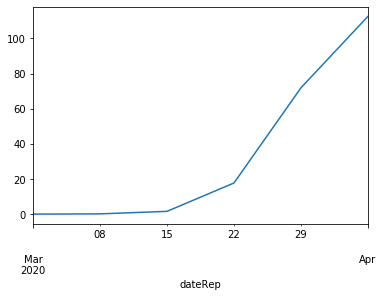

In [23]:
df_NL.Deaths['2020-03'].resample('W').mean().plot()

## April Analysis

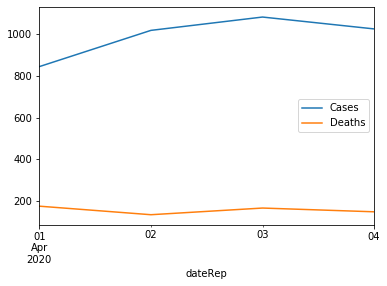

In [24]:
df_NL['2020-04'].resample('D').mean().plot()

In [25]:
#df_NL['2020-04'].resample('W').mean().plot()

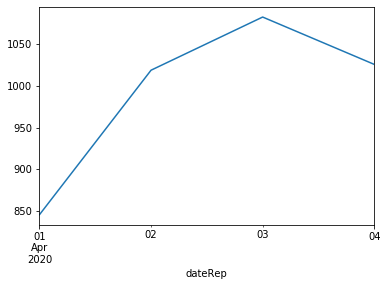

In [26]:
df_NL.Cases['2020-04'].resample('D').mean().plot()

In [27]:
#df_NL.Cases['2020-04'].resample('W').mean().plot()

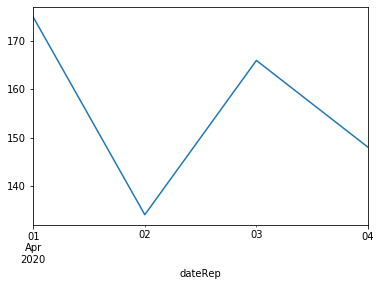

In [28]:
df_NL.Deaths['2020-04'].resample('D').mean().plot()

In [29]:
#df_NL.Deaths['2020-04'].resample('W').mean().plot()